Rename this file to MATH404_HW1_your_first_and_last_name before submitting

Instructions: 

1. Write the function $$f((x_1, x_2)) = sin(\sqrt{x_1^2 + x_2^2}) + 1.001*\sqrt{x_1^2 + x_2^2}$$ in python. 

2. Write $\nabla f((x_1, x_2))$ in python.

3. Write a function called SGD which implements Stochastic Gradient Descent as described in class (you can look this algorithm up online, but write your own code).  The inputs to this function must at least include f, gradient of f, initial starting position $\vec{x}_0$, number of iterations, and learning rate.  Output the final coordinates $\vec{x}_n$, and the final value of the function $f(\vec{x}_n)$.

4. Play around with the learning rate to get small errors (you should be able to get $f(\vec{x}_n)$ under 0.2 with most random initial starting positions about (0, 0) in $n=10000$ iterations with an appropriate learning rate).  You can use the function avg_error I have written below, or build your own function to demonstrate your results.

## $f(x_1, x_2)$

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = lambda x: np.sin((x[0] ** 2 + x[1] ** 2) ** (1 / 2)) + 1.001 * (x[0] ** 2 + x[1] ** 2) ** (1 / 2)

## $\nabla f(x_1, x_2)$

In [2]:
def gradient_f(x):
    d_dx1 = x[0] * (np.cos(np.sqrt(x[0] * x[0] + x[1] * x[1])) + 1.001) / np.sqrt(x[0] * x[0] + x[1] * x[1])
    d_dx2 = x[1] * (np.cos(np.sqrt(x[0] * x[0] + x[1] * x[1])) + 1.001) / np.sqrt(x[0] * x[0] + x[1] * x[1])
    
    return np.array([d_dx1, d_dx2])

## SGD

In [18]:
def sgd(f, gradient_f, start_vector, num_iterations=10000, learning_rate=1e-3):
    for _ in range(num_iterations):
        gradient = gradient_f(start_vector)     # Get the gradient for the starting vector
        step_size = gradient * learning_rate    # Scale input vector gradient by learning rate
        start_vector = start_vector - step_size # Adjust input vector based on scaled step size vector
        
    return start_vector, f(start_vector)

In [129]:
def verify_model(learning_rate=5e-3, num_iterations=10000, samples=1000, xy_variance=5):
    rand_x = np.random.randn(samples) * xy_variance
    rand_y = np.random.randn(samples) * xy_variance
    error = [sgd(f, gradient_f, [rand_x[i], rand_y[i]], num_iterations, learning_rate)[1] for i in range(samples)]
    
    df = pd.DataFrame(np.transpose([error, rand_x, rand_y]), columns=["End Error", "Start X", "Start Y"])
    df['Acceptable'] = df['End Error'] < 0.2
    
    print ("Average error after {} samples of {} iterations is {:.2f}.\n{:.1f}% of the samples are below 0.2.".format(samples, num_iterations, df['End Error'].mean(), 100*len(df[df['End Error'] < 0.2]) / samples))
    
    return df

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Average error after 10000 samples of 10000 iterations is 0.15.
95.5% of the samples are below 0.2.


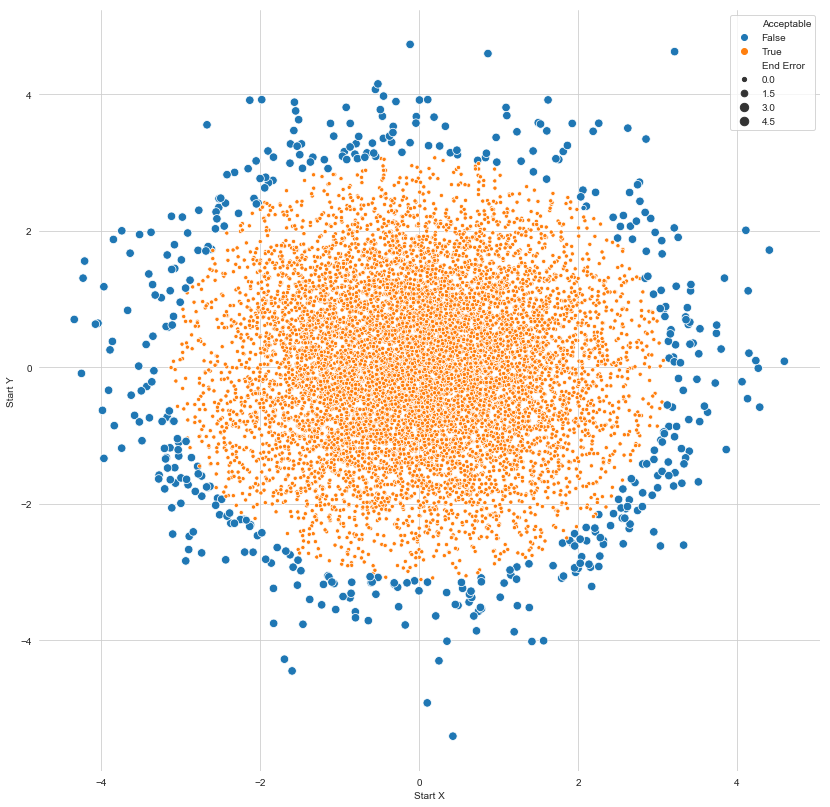

In [133]:
df = verify_model(samples=10000, xy_variance=1.25)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 14))
sns.scatterplot(x='Start X', y='Start Y', size='End Error', data=df, hue='Acceptable')
sns.despine(top=True, right=True, bottom=True, left=True)